### Math Final Project - Group 3

#### Members:
<ul>
    <li>Narjes Amousoltani F.</li>
    <li>Aanandita Madan Chavan</li>
    <li>Jorge Luis Galarraga Prince</li>
    <li>Mark Kale, Abdullah Malik</li>
    <li>Shreeya Shah</li>
    <li>Sirjana Shrestha</li>
    <li>Dushyant Tyagi</li>
</ul>

##### Dataset link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

# Preprocessing section

Importing all the libraries and methods

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [2]:
df = pd.read_csv('Hotel_Reservations.csv')

In [3]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Encoding categorical data

### Encoding the Independent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = df.iloc[:, -1].values
y_encoded = le.fit_transform(y)
y_encoded

In [8]:
le = LabelEncoder()
y_encoded = df.iloc[:, -1].values
y_encoded = le.fit_transform(y_encoded)
y_encoded

array([1, 1, 0, ..., 1, 0, 1])

---
# Exploratory Data Analysis 

In [10]:
df.shape

(36275, 19)

##### Observation: We have too many features and few samples, taking into account the number of features.

In [11]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [13]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

---
# Insights

In [14]:
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

**67.23% of the booking are not cancelled and 32.76 % of booking are cancelled**

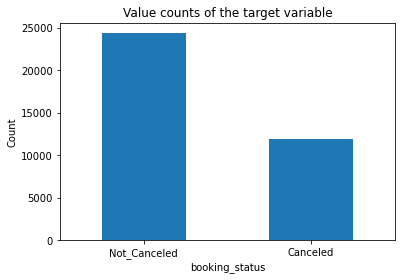

In [15]:
df.booking_status.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("booking_status")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

**Visualization of booking status**

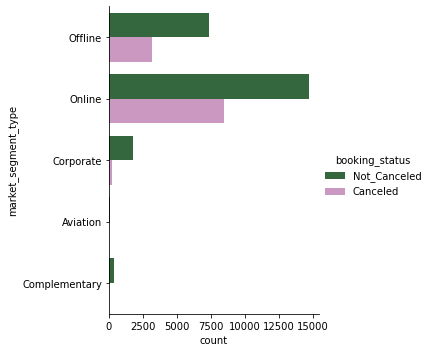

In [16]:
# Booking Status based on Market segmentation
sns.catplot(y="market_segment_type", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Online booking are canceled more than offline, followed by corporate market segment

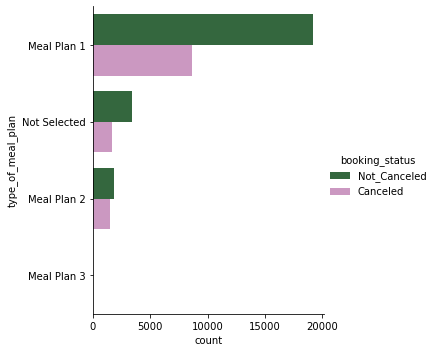

In [17]:
sns.catplot(y="type_of_meal_plan", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Meal Plan 1 is the most popular type of meal_plan

<AxesSubplot:xlabel='room_type_reserved', ylabel='avg_price_per_room'>

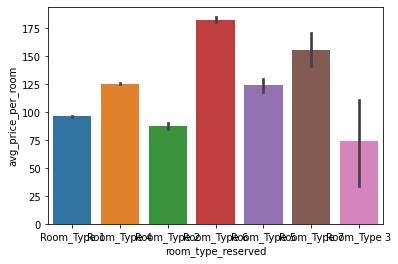

In [18]:
# Average Price per room based on room type reserved
sns.barplot(data=df, x="room_type_reserved", y="avg_price_per_room")

### Encoding market_segment_type'

In [19]:
df['market_segment_type'] = LabelEncoder().fit_transform(df['market_segment_type'])

Observations:
The items below were dropped from the dataset, since they didn't increase the accuracy of the model, moreover, they were categorical items.

room_type_reserved
type_of_meal_plan
Booking_ID

In [20]:
# df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True)
# df.drop(['Booking_ID', 'type_of_meal_plan'], axis=1, inplace=True) no parameters accuracy score 0.7754295690526509 and 0.7583386933749885 with huber
# df.drop(['Booking_ID', 'room_type_reserved'], axis=1, inplace=True) no parameters accuracy score 0.67 and 0.7746025911972801 with huber
# df.drop(['Booking_ID'], axis=1, inplace=True) no parameters accuracy score 0.7665165855003216 and 0.771110906919048 with huber
# df.drop(['Booking_ID'], axis=1, inplace=True)
# df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True) no parameters accuracy score 0.7723973169162914 and 0.7655058347882018 with huber
df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True)

---
# SGD Section

### Training the model 

In [21]:
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']
num_feats = df.shape[1]-1

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Stochastic Gradient Descent for Classification- if booking status is cancelled or not

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
SGD_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

In [26]:
SGD_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [27]:
SGD_predictions = SGD_model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,SGD_predictions))

[[1675 1847]
 [ 625 6736]]


In [29]:
accuracy_score(y_test, SGD_predictions)

0.7728567490581641

In [30]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8411

### Scale the dataset

In [31]:
from sklearn.preprocessing import MinMaxScaler   # Transforms features by scaling each feature to a given range

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   # 

In [32]:
SGD_model.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
SGD_predictions = SGD_model.predict(X_test)

In [33]:
print(confusion_matrix(y_test,SGD_predictions))

[[2684  838]
 [1594 5767]]


In [34]:
accuracy_score(y_test, SGD_predictions)

0.7765322061931452

In [35]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8451

---
### Use of GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'loss':[ 'hinge', 'log_loss', 'modified_huber'], 
              'alpha': [0.0001, 0.001, 0.01, 0.1]}

In [38]:
SGD_model = SGDClassifier()

In [39]:
grid = GridSearchCV(SGD_model, param_grid)

In [40]:
#%time
grid.fit(X_train, y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log_loss', 'modified_huber']})

In [41]:
grid.best_estimator_

SGDClassifier(loss='log_loss')

In [42]:
model = grid.best_estimator_
model

SGDClassifier(loss='log_loss')

In [43]:
grid.best_params_

{'alpha': 0.0001, 'loss': 'log_loss'}

In [44]:
yfit = model.predict(X_test)

In [45]:
confusion_matrix(y_test, yfit)

array([[2549,  973],
       [1338, 6023]])

In [46]:
accuracy_score(y_test, yfit)

0.7876504640264633

### Feature Selection

<AxesSubplot:>

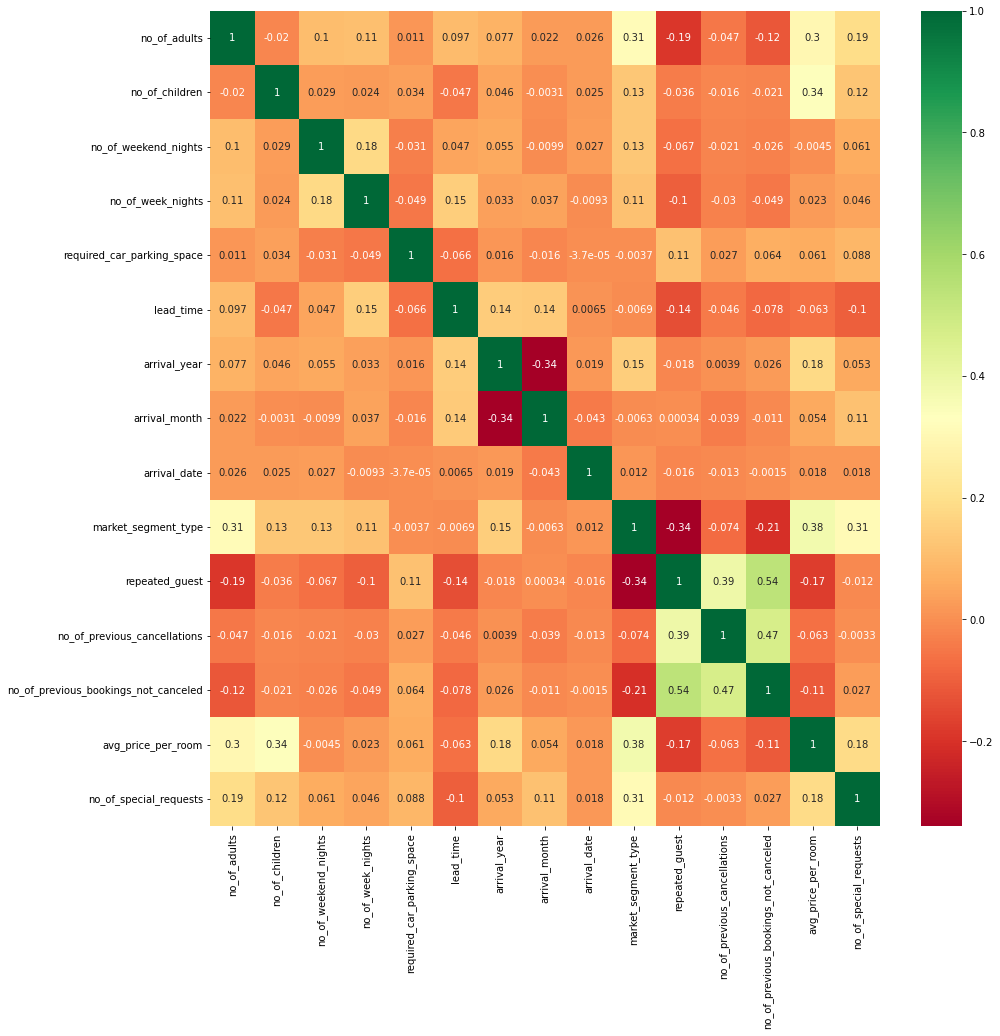

In [47]:
# Correlation among the variables
corrmat = df.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [15, 15]
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [48]:
feature_name = list(X.columns)
feature_name

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**Chi-square**

In [49]:
def chi_squared_selector(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    return chi_support, chi_feature

In [50]:
chi_support, chi_feature = chi_squared_selector(X, y, num_feats)
chi_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**RFE**

In [51]:
def rfe_selector(X, y, num_feats):
    X_train = MinMaxScaler().fit_transform(X)
    lr = LogisticRegression(solver='lbfgs')
    rfe_lr = RFE(estimator=lr, 
             n_features_to_select=5,
             step=1,
             verbose=5)
    rfe_lr = rfe_lr.fit(X_train, y)
    rfe_lr_support = rfe_lr.get_support()
    rfe_lr_feature = X.loc[:, rfe_lr_support].columns.tolist()
    return rfe_lr_support, rfe_lr_feature

In [52]:
rfe_lr_support, rfe_lr_feature = rfe_selector(X, y, num_feats)
rfe_lr_feature

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


['required_car_parking_space',
 'lead_time',
 'market_segment_type',
 'avg_price_per_room',
 'no_of_special_requests']

**Logistic Regression (Lasso)**

In [53]:
def embedded_log_reg_selector(X, y, num_feats):
    logreg = LogisticRegression(penalty='l1', solver='liblinear')
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=50000), max_features=num_feats)
    embedded_lr_selector = embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()
    return embedded_lr_support, embedded_lr_feature

In [54]:
embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
embedded_lr_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**Tree based Randonm Forest**

In [55]:
def embedded_rf_selector(X, y, num_feats):
    rf = RandomForestClassifier(n_estimators=100)
    embedded_rf_selector = SelectFromModel(rf, 
                           max_features=num_feats)
    embedded_rf_selector = embedded_rf_selector.fit(X, y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    return embedded_rf_support, embedded_rf_feature

In [56]:
embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
embedded_rf_feature

['lead_time',
 'arrival_month',
 'arrival_date',
 'avg_price_per_room',
 'no_of_special_requests']

**Tree based LightGBM**

In [57]:
def embedded_lgbm_selector(X, y, num_feats):
    lgbmc = LGBMClassifier(n_estimators=500,
                           learning_rate=0.05,
                           num_leaves=32,
                           colsample_bytree=0.2,
                           reg_alpha=3,
                           reg_lambda=1,
                           min_split_gain=0.01,
                           min_child_weight=40)
    embedded_lgbm_selector = SelectFromModel(lgbmc, 
                                             max_features=num_feats)
    embedded_lgbm_selector = embedded_lgbm_selector.fit(X, y)
    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:, embedded_lgbm_support].columns.tolist()
    
    return embedded_lgbm_support, embedded_lgbm_feature

In [58]:
embedded_lgbm_selector(X, y, num_feats)

(array([False, False, False,  True, False,  True, False,  True,  True,
        False, False, False, False,  True, False]),
 ['no_of_week_nights',
  'lead_time',
  'arrival_month',
  'arrival_date',
  'avg_price_per_room'])

In [59]:
def autoFeatureSelector(dataset_path, methods=[]):
    if 'chi-square' in methods:
        chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
    if 'rfe' in methods:
        rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
    if 'log-reg' in methods:
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
    if 'rf' in methods:
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
    if 'lgbm' in methods:
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)
    
    
    pd.set_option('display.max_rows', None)

    
    feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})

    feature_selection_df['Total'] = feature_selection_df.sum(axis=1)
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    feature_selection_df.head(num_feats)

    return feature_selection_df

In [60]:
best_features = autoFeatureSelector(dataset_path="Hotel_Reservations.csv", methods=['chi-square', 'rfe', 'log-reg', 'rf', 'lgbm'])
best_features.head(20)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


/var/folders/qn/c0ll_4m107d0w2b21m8wkgz80000gn/T/ipykernel_7056/3123419553.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_selection_df['Total'] = feature_selection_df.sum(axis=1)


,Feature,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,lead_time,True,True,True,True,True,5
2,avg_price_per_room,True,True,True,True,True,5
3,no_of_special_requests,True,True,True,True,False,4
4,arrival_month,True,False,True,True,True,4
5,arrival_date,True,False,True,True,True,4
6,required_car_parking_space,True,True,True,False,False,3
7,no_of_week_nights,True,False,True,False,True,3
8,market_segment_type,True,True,True,False,False,3
9,repeated_guest,True,False,True,False,False,2
10,no_of_weekend_nights,True,False,True,False,False,2


### Dropping the  least important features based on ranking of feature selector

In [61]:
X = df.drop(['booking_status','no_of_children',
            'no_of_adults','arrival_year'], axis=1)
y = df['booking_status']
num_feats = df.shape[1]-1

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

---
### Fitting the model

In [63]:
SGD_model.fit(X_train, y_train)

SGDClassifier()

In [64]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   # 

In [65]:
SGD_model.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
SGD_predictions = SGD_model.predict(X_test)

In [66]:
confusion_matrix(y_test, SGD_predictions)

array([[2886,  636],
       [2119, 5242]])

In [67]:
accuracy_score(y_test, SGD_predictions)

0.7468528898281723

In [68]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8128

---
# Random Forest Regression

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 1)

### Training the Random Forest Regression model on the whole dataset

# This was already imported 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
pred = rf.predict(X_test)
accuracy_score(y_test, pred)

0.9058580289455548

In [76]:
RF_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_samples=0.75, n_jobs=-1, verbose = 1)

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in RF_clf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

## Assessing Random Forest Performance

In [ ]:
RF_train_predictions = RF_clf.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

RF_predictions = RF_clf.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]


### Helper function to evaluate model

In [84]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [92]:
from collections import Counter

### Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix
import itertools

#  Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [ ]:
accuracy_score(y_test, RF_predictions)

0.9055823569951758

Confusion matrix, without normalization
[[1905  443]
 [ 253 4654]]


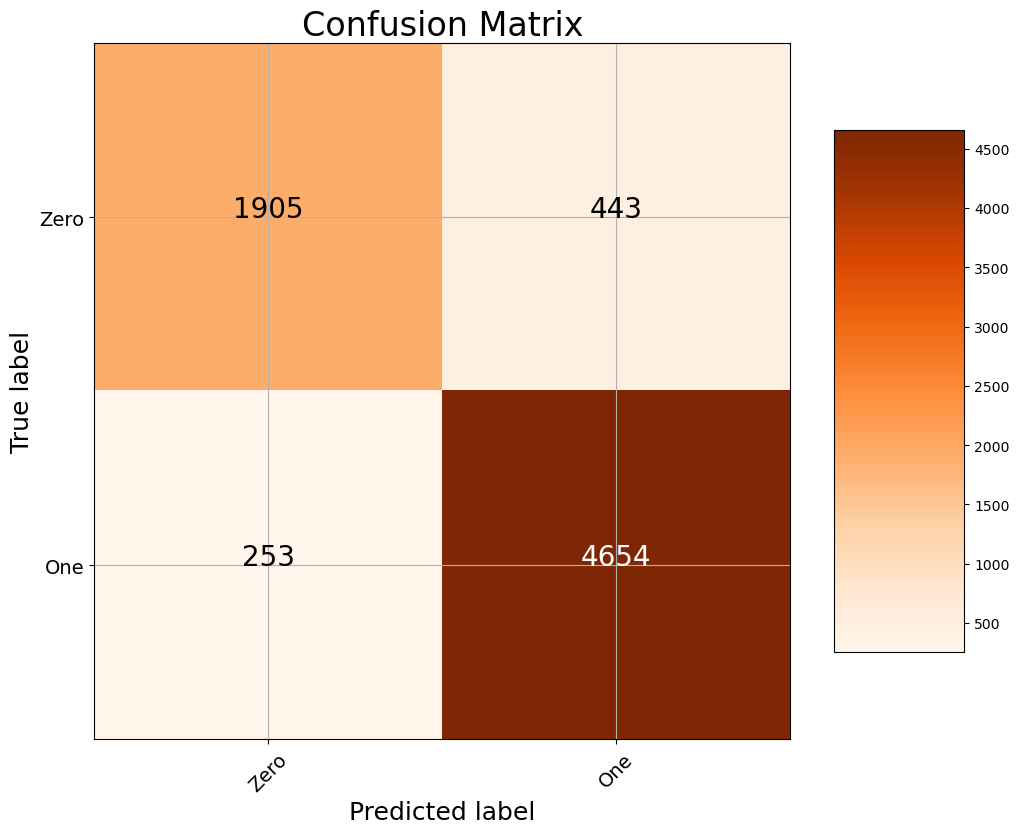

In [94]:
cm=confusion_matrix(y_test,RF_predictions)
plot_confusion_matrix(cm, classes = ['Zero', 'One'],
                      title = 'Confusion Matrix')


### GridSearchCV for Random Forest

In [95]:
#assigned value to hyperparameters for testing - hyperparameter tunning
n_estimators = [20,60,100,120]
max_features = ['auto', 'sqrt','log2', None]
max_depths = [2, 8, None]
max_samples = [1,3,10]

#training 108 diff random forest

In [96]:
pm_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depths,
           'max_samples': max_samples,
            }
print(pm_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [2, 8, None], 'max_samples': [1, 3, 10]}


In [97]:
RF = RandomForestClassifier()

In [98]:
from sklearn.model_selection import GridSearchCV

RF_Grid = GridSearchCV(estimator=RF,          
                       param_grid=pm_grid,
                       cv=5,                   #108 forests trains for 5 times
                       verbose=2,              
                       n_jobs=-1
)

In [99]:
RF_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_samples': [1, 3, 10],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [100]:
RF_Grid.best_params_  # Parameter setting that gave the best results

{'max_depth': None,
 'max_features': None,
 'max_samples': 10,
 'n_estimators': 120}

In [101]:
RF_Grid.best_estimator_  # estimator which gave highest score

RandomForestClassifier(max_features=None, max_samples=10, n_estimators=120)

In [102]:
from matplotlib import pyplot as plt
grid_predictions = grid.predict(X_test)

Confusion matrix, without normalization
[[2348    0]
 [4822   85]]


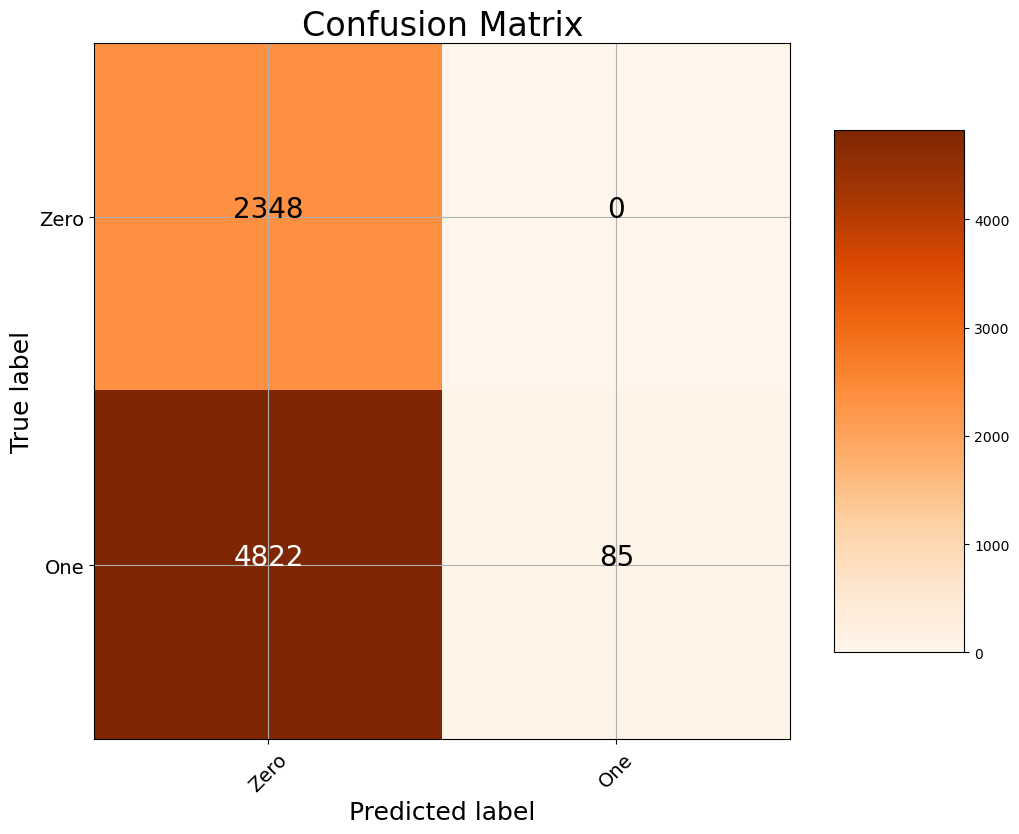

In [121]:
cm2 = confusion_matrix(y_test,grid_predictions)
cm2

plot_confusion_matrix(cm2, classes = ['Zero', 'One'], title = 'Confusion Matrix')

---